In [1]:
# Import Dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time 
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.

latitudes = np.random.uniform(low = -90, high = 90, size = 1500)
longitudes = np.random.uniform (low = -180, high = 180, size = 1500)
latitudes_longitudes = zip(latitudes,longitudes)
latitudes_longitudes

In [3]:
# Unpack the longitudes and latitudes and put them in a list. 

coordinates = list(latitudes_longitudes)
len(coordinates)

1500

In [4]:
# Nearest cities for the above coordinates.

# Create a empty list that will hold all the cities name nearest to the above coordinates.
cities = []
# Identify the nearest city for each latitude and longitutde combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # if city is unique then add to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



635

In [5]:
# Basic for the OpenWeatherMap with weather_api_key added to the URL.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold weather data for cities.
city_data = []
# Print the begining of logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1

set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | solton
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | moron
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 1 | atasu
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | bud
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | vaitape
Processing Record 17 of Set 1 | bathsheba
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | hualmay
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | mataura
Proces

City not found. Skipping...
Processing Record 38 of Set 4 | nome
Processing Record 39 of Set 4 | ponta delgada
Processing Record 40 of Set 4 | port blair
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | kenai
Processing Record 43 of Set 4 | northam
Processing Record 44 of Set 4 | cap malheureux
Processing Record 45 of Set 4 | college
Processing Record 46 of Set 4 | cabo san lucas
Processing Record 47 of Set 4 | ostrovnoy
Processing Record 48 of Set 4 | garowe
Processing Record 49 of Set 4 | sahrak
City not found. Skipping...
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | egvekinot
Processing Record 3 of Set 5 | gornopravdinsk
Processing Record 4 of Set 5 | vila velha
Processing Record 5 of Set 5 | humaita
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | nampa
Processing Record 8 of Set 5 | baherden
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 of Set 5 

Processing Record 27 of Set 8 | ahipara
Processing Record 28 of Set 8 | ibipora
Processing Record 29 of Set 8 | chesma
Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | doha
Processing Record 32 of Set 8 | middelburg
Processing Record 33 of Set 8 | aripuana
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | chipinge
Processing Record 36 of Set 8 | puerto palomas
Processing Record 37 of Set 8 | aginskoye
Processing Record 38 of Set 8 | olga
Processing Record 39 of Set 8 | satitoa
City not found. Skipping...
Processing Record 40 of Set 8 | hofn
Processing Record 41 of Set 8 | eureka
Processing Record 42 of Set 8 | broome
Processing Record 43 of Set 8 | sao jose da coroa grande
Processing Record 44 of Set 8 | todos santos
Processing Record 45 of Set 8 | bobo dioulasso
Processing Record 46 of Set 8 | hirara
Processing Record 47 of Set 8 | gopalur
Processing Record 48 of Set 8 | coahuayana
Processing Record 49 of Set 8 | kadykchan
City not foun

Processing Record 12 of Set 12 | nabire
Processing Record 13 of Set 12 | mehamn
Processing Record 14 of Set 12 | savinka
Processing Record 15 of Set 12 | pauini
Processing Record 16 of Set 12 | bahia de caraquez
Processing Record 17 of Set 12 | shimoda
Processing Record 18 of Set 12 | matara
Processing Record 19 of Set 12 | bay roberts
Processing Record 20 of Set 12 | isangel
Processing Record 21 of Set 12 | vostok
Processing Record 22 of Set 12 | sohna
Processing Record 23 of Set 12 | axixa do tocantins
City not found. Skipping...
Processing Record 24 of Set 12 | severnyy-kospashskiy
Processing Record 25 of Set 12 | mayor pablo lagerenza
Processing Record 26 of Set 12 | wanxian
Processing Record 27 of Set 12 | rock sound
Processing Record 28 of Set 12 | imbituba
Processing Record 29 of Set 12 | barcelos
Processing Record 30 of Set 12 | monrovia
Processing Record 31 of Set 12 | krasnaya gorka
Processing Record 32 of Set 12 | sargatskoye
Processing Record 33 of Set 12 | vydrino
Processi

In [7]:
# Tally number of cities on the city_data.  
len(city_data)

584

In [8]:
# Create the DataFrame from the array of dictionaries.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,55.99,54,75,13.87,US,2020-04-06 00:16:00
1,Torbay,47.67,-52.73,28.00,85,20,4.70,CA,2020-04-06 00:20:29
2,Saskylakh,71.92,114.08,18.75,96,94,7.54,RU,2020-04-06 00:20:30
3,Solton,52.84,86.48,31.66,86,0,4.27,RU,2020-04-06 00:20:30
4,Hermanus,-34.42,19.23,60.01,77,81,5.99,ZA,2020-04-06 00:18:34
5,Arraial Do Cabo,-22.97,-42.03,75.29,71,72,9.53,BR,2020-04-06 00:16:40
6,Thompson,55.74,-97.86,23.00,62,20,5.82,CA,2020-04-06 00:20:34
7,Moron,-34.65,-58.62,71.01,73,75,3.36,AR,2020-04-06 00:17:29
8,Yellowknife,62.46,-114.35,23.00,49,20,13.87,CA,2020-04-06 00:20:35
9,Atasu,48.68,71.64,41.85,67,23,7.52,KZ,2020-04-06 00:20:35


In [9]:
# Reorder the columns of the  city data DataFrame.

new_columns_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_columns_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-04-06 00:16:00,42.60,-73.97,55.99,54,75,13.87
1,Torbay,CA,2020-04-06 00:20:29,47.67,-52.73,28.00,85,20,4.70
2,Saskylakh,RU,2020-04-06 00:20:30,71.92,114.08,18.75,96,94,7.54
3,Solton,RU,2020-04-06 00:20:30,52.84,86.48,31.66,86,0,4.27
4,Hermanus,ZA,2020-04-06 00:18:34,-34.42,19.23,60.01,77,81,5.99
5,Arraial Do Cabo,BR,2020-04-06 00:16:40,-22.97,-42.03,75.29,71,72,9.53
6,Thompson,CA,2020-04-06 00:20:34,55.74,-97.86,23.00,62,20,5.82
7,Moron,AR,2020-04-06 00:17:29,-34.65,-58.62,71.01,73,75,3.36
8,Yellowknife,CA,2020-04-06 00:20:35,62.46,-114.35,23.00,49,20,13.87
9,Atasu,KZ,2020-04-06 00:20:35,48.68,71.64,41.85,67,23,7.52


In [10]:
# Create the output csv file.

output_data_file = "weather_data/cities.csv"
# Export the city_data into the csv file.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
# Extract relavant fields from the DataFrame for plotting. 

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [12]:
# Get today's date in seconds using time from time moduledate.
date_today = time.time()
date_today = time.strftime('%x')
date_today

'04/05/20'

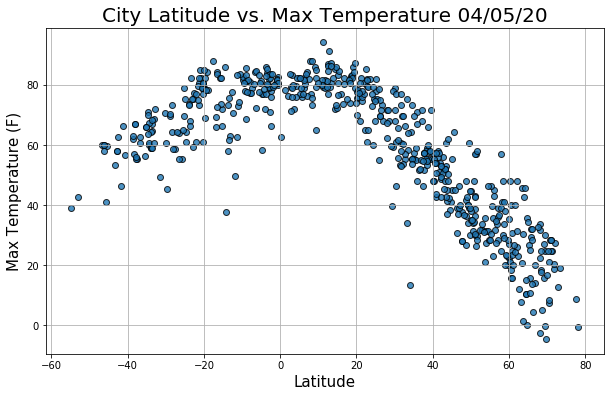

In [13]:
# Plot Latitude vs. Temperature.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, max_temps, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Max Temperature (F)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig1.png')
# Show the plot.
plt.show()

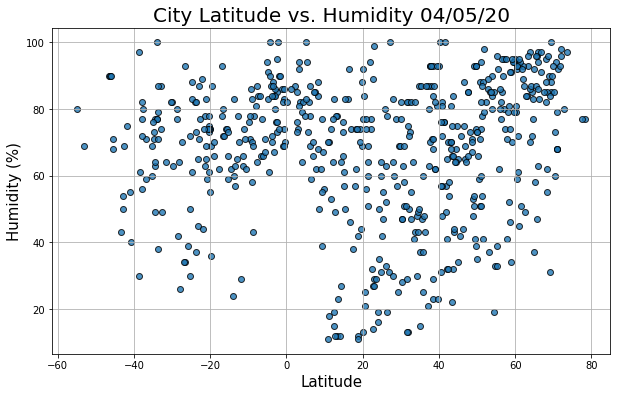

In [14]:
# Plot Latitude vs. humidity.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, humidity, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Humidity (%)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig2.png')
# Show the plot.
plt.show()

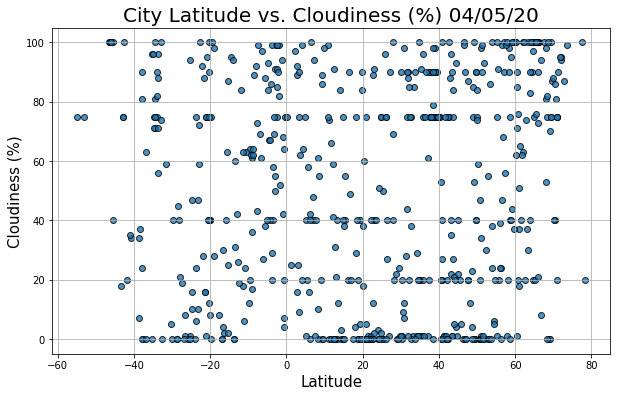

In [15]:
# Plot Latitude vs. cloudiness.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, cloudiness, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Cloudiness (%)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig3.png')
# Show the plot.
plt.show()

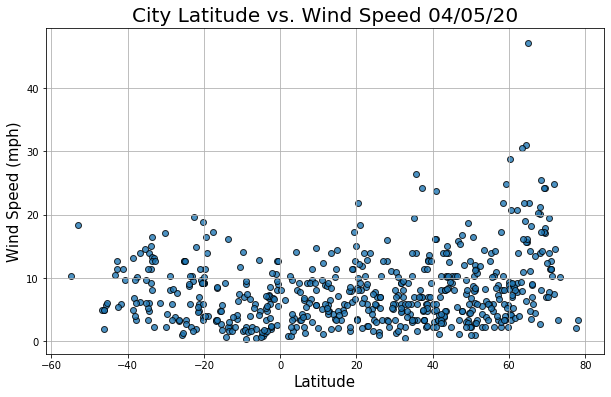

In [16]:
# Plot Latitude vs. wind speed.

# Set the size of the figure.
plt.subplots(figsize = (10,6))
plt.scatter(lats, wind_speed, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')
# Other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime('%x'), fontsize = 20)
plt.ylabel('Wind Speed (mph)', fontsize = 15)
plt.xlabel('Latitude', fontsize = 15)
plt.grid(True)
# Save the figure.
plt.savefig('weather_data/Fig4.png')
# Show the plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation
# with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

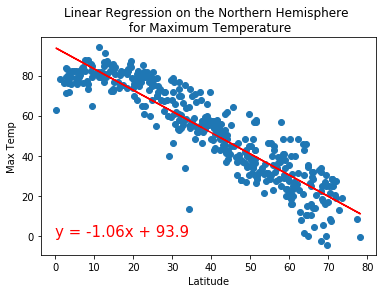

In [19]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title_1 = 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values,title_1,'Max Temp',(0,0))


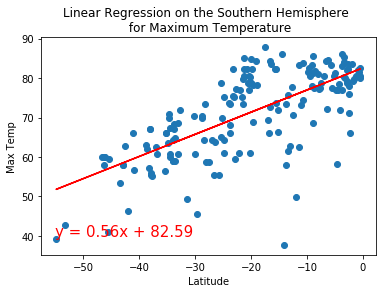

In [20]:
# Linear regression on the Southern Hemisphere.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values,title, 'Max Temp',(-55,40))

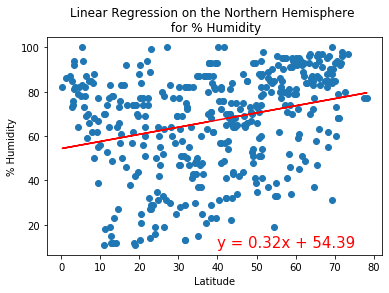

In [21]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

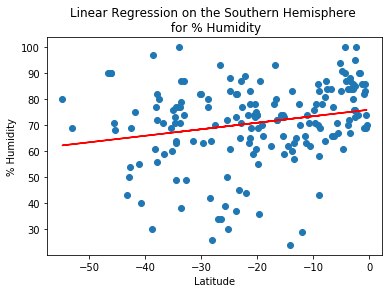

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,18))

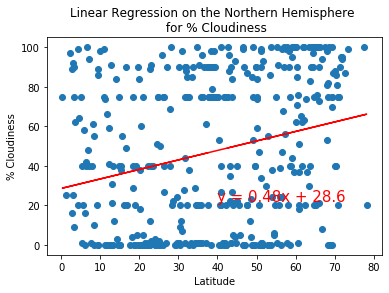

In [23]:
# Linear regression on the Northern Hemisphere.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,22))

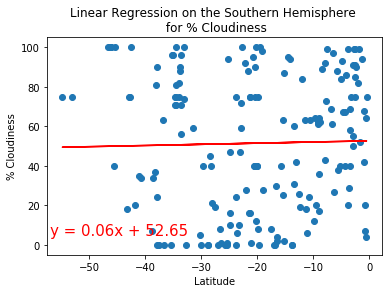

In [24]:
# Linear regression on the Southern Hemisphere.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-57,5))

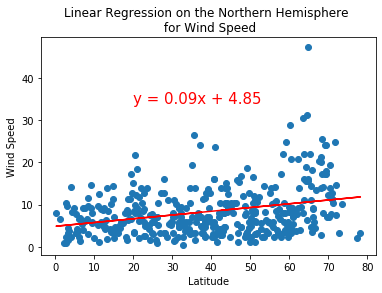

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,34))

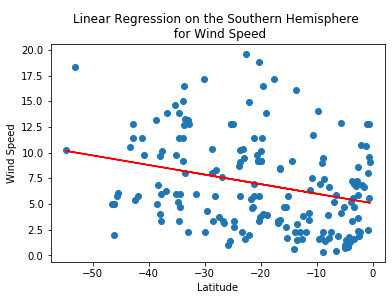

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,23))